In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [49]:
df = pd.read_csv("../Churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
## drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # female = 0, male = 1

In [53]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=False)

df[['Geography_France', 'Geography_Germany', 'Geography_Spain']] = (
    df[['Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)
)

In [54]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [55]:
## Train-test Split
X = df.drop('Exited', axis=1)
y = df['Exited']

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
print("X_train:", X_train.shape)   # should be (8000, n_features)
print("y_train:", y_train.shape)   # should be (8000,)
print("X_test:", X_test.shape)     # should be (2000, n_features)
print("y_test:", y_test.shape)     # should be (2000,)

X_train: (8000, 12)
y_train: (8000,)
X_test: (2000, 12)
y_test: (2000,)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [60]:
model = Sequential([

    ## 1st Hidden Layer 
    Dense(units=16, activation='relu', input_dim = X_train.shape[1]),

    ## 2nd Hidden Layer
    Dense(units=8, activation='relu'),

    ## Output Layer
    Dense(units=1, activation='sigmoid')
])

c:\Users\LAKSHAY JAIN\Downloads\CODING\DATA SCIENCE\PROJECTS\Churn Prediciton Model\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1
)


Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6947 - loss: 0.5859 - val_accuracy: 0.8150 - val_loss: 0.4404
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.4381 - val_accuracy: 0.8215 - val_loss: 0.4191
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.4308 - val_accuracy: 0.8255 - val_loss: 0.4068
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.4149 - val_accuracy: 0.8320 - val_loss: 0.3967
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.4000 - val_accuracy: 0.8335 - val_loss: 0.3850
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.3838 - val_accuracy: 0.8415 - val_loss: 0.3731
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3755 - val_accuracy: 0.8480 - val_loss: 0.3640
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8517 - loss: 0.3669 - val_accuracy: 0.8530

In [64]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.3371  
Test Accuracy: 0.8570


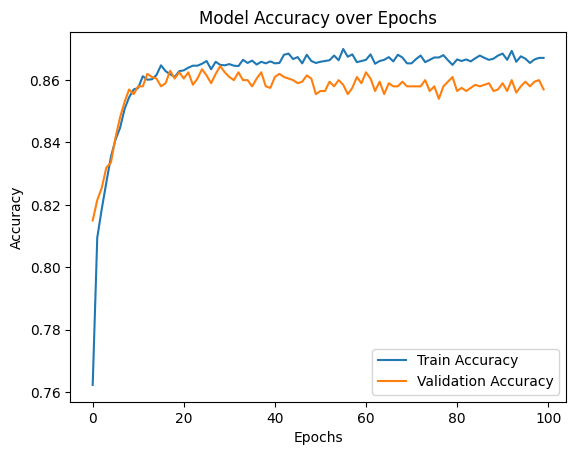

In [65]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
model.add(Dropout(0.3))

In [67]:
model.save("../model/churn_ann_model.h5")
with open("../model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [68]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1527   80]
 [ 206  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


Accuracy Score: 0.857


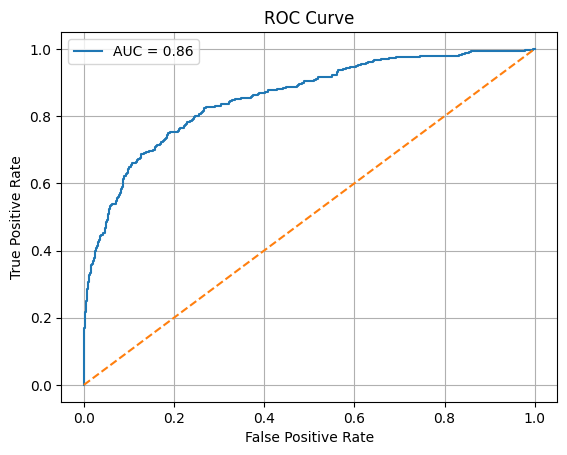

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
